In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cấu hình
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (16, 10)
sns.set_palette("Set2")

print("📂 Đang tải dữ liệu...")
df_events = pd.read_csv('../data/udk_moodle_log.csv')
print(f"✅ Đã tải {len(df_events):,} events với {df_events.shape[1]} cột")

📂 Đang tải dữ liệu...
✅ Đã tải 1,259,411 events với 8 cột


In [4]:
# Phân tích missing data
print("\n📊 PHÂN TÍCH MISSING DATA\n" + "="*50)

# Tính missing values cho mỗi cột
missing_stats = pd.DataFrame({
    'column': df_events.columns,
    'missing_count': df_events.isnull().sum().values,
    'missing_pct': (df_events.isnull().sum().values / len(df_events) * 100)
})
missing_stats = missing_stats[missing_stats['missing_count'] > 0].sort_values('missing_pct', ascending=False)

print("\n🔍 Các cột có dữ liệu thiếu:")
if len(missing_stats) > 0:
    for idx, row in missing_stats.iterrows():
        print(f"   {row['column']:20s}: {row['missing_count']:8,} ({row['missing_pct']:6.2f}%)")
else:
    print("   ✅ Không có cột nào bị thiếu dữ liệu!")

# Tính tỷ lệ rows có ít nhất 1 missing value
rows_with_missing = df_events.isnull().any(axis=1).sum()
rows_with_missing_pct = (rows_with_missing / len(df_events)) * 100

print(f"\n📉 Tổng quan:")
print(f"   • Rows có missing data: {rows_with_missing:,} ({rows_with_missing_pct:.2f}%)")
print(f"   • Rows hoàn chỉnh: {len(df_events) - rows_with_missing:,} ({100-rows_with_missing_pct:.2f}%)")
print(f"   • Tổng số missing values: {df_events.isnull().sum().sum():,}")


📊 PHÂN TÍCH MISSING DATA

🔍 Các cột có dữ liệu thiếu:
   other               :  612,293 ( 48.62%)

📉 Tổng quan:
   • Rows có missing data: 612,293 (48.62%)
   • Rows hoàn chỉnh: 647,118 (51.38%)
   • Tổng số missing values: 612,293


In [5]:
# Phân tích missing data pattern per user
if len(missing_stats) > 0:
    print("\n🔍 Phân tích Missing Pattern per User...")
    
    # Đếm số missing values per user
    user_missing = df_events.groupby('userid').apply(lambda x: x.isnull().sum().sum())
    user_total_cells = df_events.groupby('userid').size() * df_events.shape[1]
    user_missing_pct = (user_missing / user_total_cells * 100)
    
    print(f"   • Users bị ảnh hưởng: {(user_missing > 0).sum():,} / {len(user_missing):,}")
    print(f"   • Missing % trung bình per user: {user_missing_pct.mean():.2f}%")
    print(f"   • Missing % median per user: {user_missing_pct.median():.2f}%")
    print(f"   • Missing % max per user: {user_missing_pct.max():.2f}%")
else:
    user_missing_pct = pd.Series([0] * df_events['userid'].nunique())


🔍 Phân tích Missing Pattern per User...
   • Users bị ảnh hưởng: 1,108 / 1,110
   • Missing % trung bình per user: 7.37%
   • Missing % median per user: 7.75%
   • Missing % max per user: 11.88%



💾 Đang lưu biểu đồ...
✅ Đã lưu: challenge_3_missing_data.png
✅ Đã lưu: challenge_3_missing_data.pdf


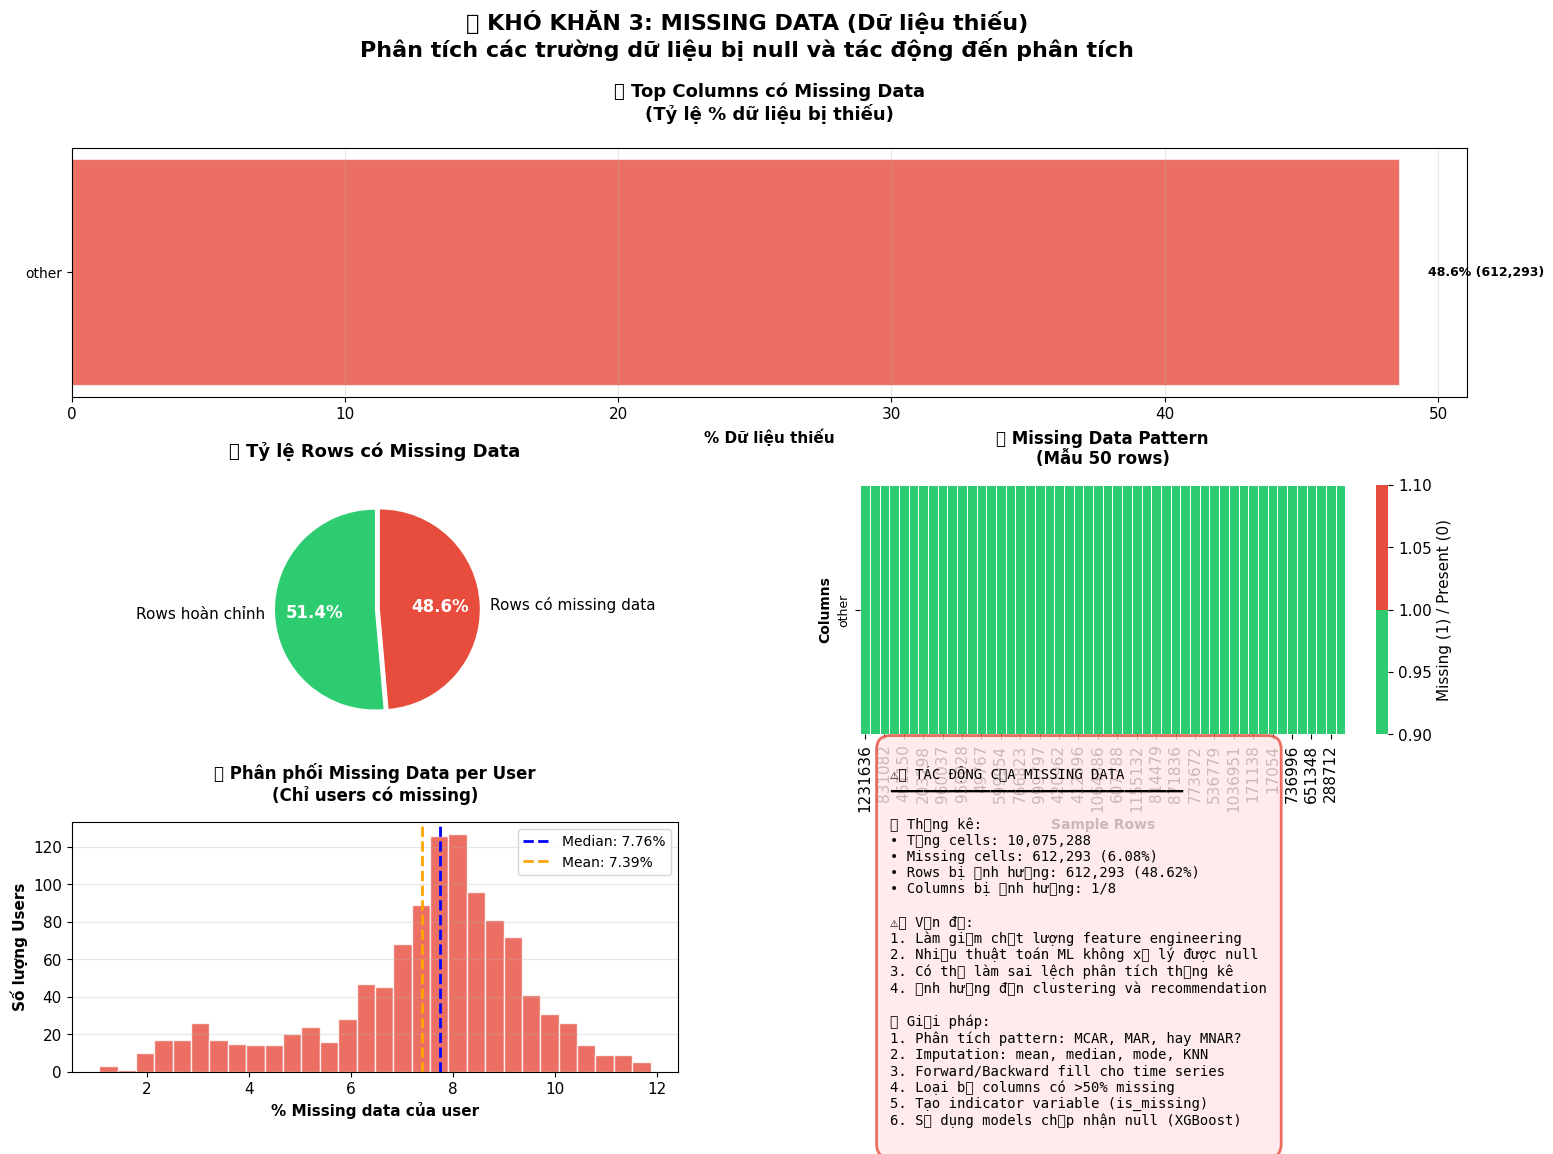


🎉 HOÀN THÀNH! Biểu đồ đã minh họa vấn đề Missing Data.


In [6]:
# Tạo biểu đồ minh họa vấn đề Missing Data
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# Màu sắc
color_missing = '#e74c3c'  # Đỏ - missing
color_complete = '#2ecc71'  # Xanh - complete

# ============================================================================
# Panel 1: Bar chart - Missing % by column
# ============================================================================
ax1 = fig.add_subplot(gs[0, :])

if len(missing_stats) > 0:
    # Lấy top 15 columns có nhiều missing nhất
    top_missing = missing_stats.head(15).sort_values('missing_pct', ascending=True)
    
    bars = ax1.barh(range(len(top_missing)), top_missing['missing_pct'], 
                    color=color_missing, edgecolor='white', linewidth=1.5, alpha=0.8)
    ax1.set_yticks(range(len(top_missing)))
    ax1.set_yticklabels(top_missing['column'], fontsize=10)
    ax1.set_xlabel('% Dữ liệu thiếu', fontweight='bold', fontsize=11)
    ax1.set_title('📊 Top Columns có Missing Data\n(Tỷ lệ % dữ liệu bị thiếu)', 
                  fontweight='bold', fontsize=13, pad=20)
    ax1.grid(axis='x', alpha=0.3)
    
    # Thêm giá trị
    for i, (bar, val, count) in enumerate(zip(bars, top_missing['missing_pct'], top_missing['missing_count'])):
        ax1.text(val + 1, i, f'{val:.1f}% ({count:,})', 
                 va='center', fontsize=9, fontweight='bold')
else:
    ax1.text(0.5, 0.5, '✅ Không có dữ liệu thiếu!', 
             ha='center', va='center', fontsize=16, fontweight='bold', color='green',
             transform=ax1.transAxes)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.axis('off')

# ============================================================================
# Panel 2: Pie chart - Rows complete vs incomplete
# ============================================================================
ax2 = fig.add_subplot(gs[1, 0])

row_status = [
    len(df_events) - rows_with_missing,  # Complete rows
    rows_with_missing  # Rows with missing
]
labels = ['Rows hoàn chỉnh', 'Rows có missing data']
colors_pie = [color_complete, color_missing]

wedges, texts, autotexts = ax2.pie(
    row_status,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors_pie,
    startangle=90,
    explode=[0, 0.05] if rows_with_missing > 0 else [0, 0]
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
ax2.set_title('📊 Tỷ lệ Rows có Missing Data', fontweight='bold', fontsize=13, pad=20)

# ============================================================================
# Panel 3: Heatmap - Missing data pattern (sample)
# ============================================================================
ax3 = fig.add_subplot(gs[1, 1])

if len(missing_stats) > 0 and rows_with_missing > 0:
    # Lấy sample rows có missing data
    rows_with_missing_idx = df_events[df_events.isnull().any(axis=1)].index
    sample_size = min(50, len(rows_with_missing_idx))
    sample_idx = np.random.choice(rows_with_missing_idx, size=sample_size, replace=False)
    
    # Lấy các columns có missing
    cols_with_missing = missing_stats['column'].head(10).tolist()
    
    # Tạo heatmap
    sample_data = df_events.loc[sample_idx, cols_with_missing].isnull().astype(int)
    
    sns.heatmap(sample_data.T, cmap=['#2ecc71', '#e74c3c'], 
                cbar_kws={'label': 'Missing (1) / Present (0)'},
                ax=ax3, linewidths=0.5, linecolor='white')
    ax3.set_xlabel('Sample Rows', fontweight='bold', fontsize=10)
    ax3.set_ylabel('Columns', fontweight='bold', fontsize=10)
    ax3.set_title('🗺️ Missing Data Pattern\n(Mẫu 50 rows)', fontweight='bold', fontsize=12, pad=15)
    ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=9)
else:
    ax3.text(0.5, 0.5, '✅ Không có missing data\nđể hiển thị pattern', 
             ha='center', va='center', fontsize=14, fontweight='bold', color='green',
             transform=ax3.transAxes)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    ax3.axis('off')

# ============================================================================
# Panel 4: Histogram - Missing % distribution per user
# ============================================================================
ax4 = fig.add_subplot(gs[2, 0])

if len(missing_stats) > 0 and (user_missing_pct > 0).any():
    user_missing_pct_filtered = user_missing_pct[user_missing_pct > 0]
    
    ax4.hist(user_missing_pct_filtered, bins=30, color=color_missing, 
             edgecolor='white', alpha=0.8)
    ax4.axvline(user_missing_pct_filtered.median(), color='blue', linestyle='--', linewidth=2,
                label=f'Median: {user_missing_pct_filtered.median():.2f}%')
    ax4.axvline(user_missing_pct_filtered.mean(), color='orange', linestyle='--', linewidth=2,
                label=f'Mean: {user_missing_pct_filtered.mean():.2f}%')
    ax4.set_xlabel('% Missing data của user', fontweight='bold', fontsize=11)
    ax4.set_ylabel('Số lượng Users', fontweight='bold', fontsize=11)
    ax4.set_title('📈 Phân phối Missing Data per User\n(Chỉ users có missing)', 
                  fontweight='bold', fontsize=12, pad=15)
    ax4.legend(fontsize=10)
    ax4.grid(axis='y', alpha=0.3)
else:
    ax4.text(0.5, 0.5, '✅ Không có user nào\nbị missing data', 
             ha='center', va='center', fontsize=14, fontweight='bold', color='green',
             transform=ax4.transAxes)
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')

# ============================================================================
# Panel 5: Text box - Tác động và giải pháp
# ============================================================================
ax5 = fig.add_subplot(gs[2, 1])
ax5.axis('off')

total_cells = len(df_events) * df_events.shape[1]
total_missing = df_events.isnull().sum().sum()
missing_pct_overall = (total_missing / total_cells) * 100

impact_text = f"""
⚠️ TÁC ĐỘNG CỦA MISSING DATA
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 Thống kê:
• Tổng cells: {total_cells:,}
• Missing cells: {total_missing:,} ({missing_pct_overall:.2f}%)
• Rows bị ảnh hưởng: {rows_with_missing:,} ({rows_with_missing_pct:.2f}%)
• Columns bị ảnh hưởng: {len(missing_stats)}/{df_events.shape[1]}

⚠️ Vấn đề:
1. Làm giảm chất lượng feature engineering
2. Nhiều thuật toán ML không xử lý được null
3. Có thể làm sai lệch phân tích thống kê
4. Ảnh hưởng đến clustering và recommendation

✅ Giải pháp:
1. Phân tích pattern: MCAR, MAR, hay MNAR?
2. Imputation: mean, median, mode, KNN
3. Forward/Backward fill cho time series
4. Loại bỏ columns có >50% missing
5. Tạo indicator variable (is_missing)
6. Sử dụng models chấp nhận null (XGBoost)
"""

ax5.text(0.05, 0.5, impact_text, fontsize=10, family='monospace',
         bbox=dict(boxstyle='round,pad=1', facecolor='#ffe6e6', alpha=0.8, 
                   edgecolor='#e74c3c', linewidth=2),
         verticalalignment='center')

# ============================================================================
# Tiêu đề chính
# ============================================================================
fig.suptitle('🚨 KHÓ KHĂN 3: MISSING DATA (Dữ liệu thiếu)\nPhân tích các trường dữ liệu bị null và tác động đến phân tích', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()

# Lưu file
print("\n💾 Đang lưu biểu đồ...")
plt.savefig('challenge_3_missing_data.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Đã lưu: challenge_3_missing_data.png")

plt.savefig('challenge_3_missing_data.pdf', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Đã lưu: challenge_3_missing_data.pdf")

plt.show()

print("\n🎉 HOÀN THÀNH! Biểu đồ đã minh họa vấn đề Missing Data.")

## Kết luận

Biểu đồ trên cho thấy:

1. **Tỷ lệ missing data** cho từng cột và tổng thể dataset
2. **Pattern của missing data** qua heatmap visualization
3. **Phân phối missing data** giữa các users
4. **Tác động** và **giải pháp** cụ thể để xử lý vấn đề này

Đây là một trong những khó khăn quan trọng cần giải quyết để đảm bảo chất lượng của feature engineering và model training.